In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as sm

In [2]:
df=pd.read_excel("samsung_dataset_final.xlsx")
df.head()

,Date,High,Low,Close,Volume,Avg_price,Open_change,High_change,Low_change,Close_change,Volume_change,Tomorrow_Change
0,2013-01-03,1584000,1543000,1543000,277934,1563500,49000,8000,16000,-33000,51144,-42000
1,2013-01-04,1542000,1510000,1525000,256920,1526000,-42000,-42000,-33000,-18000,-21014,-25000
2,2013-01-07,1528000,1500000,1520000,250247,1514000,-25000,-14000,-10000,-5000,-6673,-2000
3,2013-01-08,1517000,1498000,1500000,264689,1507500,-2000,-11000,-2000,-20000,14442,-13000
4,2013-01-09,1513000,1491000,1500000,250029,1502000,-13000,-4000,-7000,0,-14660,15000


In [3]:
dataset=df.iloc[:,1:] #date need to be removed to apply normalization


In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dataset)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.283019,0.282548,0.265329,0.175743,0.279387,0.610759,0.500000,0.547893,0.435484,0.453101,0.322785
1,0.259711,0.264266,0.255295,0.158506,0.258496,0.322785,0.350299,0.360153,0.495968,0.413161,0.376582
2,0.251942,0.258726,0.252508,0.153033,0.251811,0.376582,0.434132,0.448276,0.548387,0.421099,0.449367
3,0.245838,0.257618,0.241360,0.164879,0.248189,0.449367,0.443114,0.478927,0.487903,0.432786,0.414557
4,0.243618,0.253740,0.241360,0.152854,0.245125,0.414557,0.464072,0.459770,0.568548,0.416678,0.503165


In [5]:
df_normalized.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.999424,0.999415,-0.023829,0.999859,0.049087,0.051699,0.041041,0.028325,0.007938,0.009742
1,0.999424,1.000000,0.999516,-0.042913,0.999853,0.051687,0.045101,0.051482,0.030730,-0.004719,0.010024
2,0.999415,0.999516,1.000000,-0.037181,0.999609,0.051186,0.056462,0.056439,0.050736,-0.002216,0.029284
3,-0.023829,-0.042913,-0.037181,1.000000,-0.033284,-0.106835,0.004235,-0.173825,-0.087159,0.518202,-0.037532
4,0.999859,0.999853,0.999609,-0.033284,1.000000,0.050382,0.048439,0.046218,0.029520,0.001671,0.009883
5,0.049087,0.051687,0.051186,-0.106835,0.050382,1.000000,0.687766,0.713944,0.328433,-0.066127,-0.014655
6,0.051699,0.045101,0.056462,0.004235,0.048439,0.687766,1.000000,0.685156,0.667422,0.164436,0.385403
7,0.041041,0.051482,0.056439,-0.173825,0.046218,0.713944,0.685156,1.000000,0.722071,-0.241714,0.370853
8,0.028325,0.030730,0.050736,-0.087159,0.029520,0.328433,0.667422,0.722071,1.000000,-0.110906,0.689257
9,0.007938,-0.004719,-0.002216,0.518202,0.001671,-0.066127,0.164436,-0.241714,-0.110906,1.000000,-0.028741


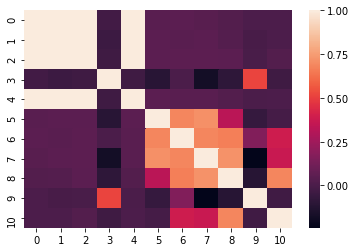

In [6]:
#High	-	0
#Low	-	1
#Close	-	2
#Volume	-	3
#Average	4
#Open_change	-	5
#High_change	-	6
#Low_change	-	7
#Close_change	-	8
#Volume_change	-	9
#Open_Price_tomorrow	-	10

df_visual_corr=df_normalized.corr()
# plot the heatmap
sns.heatmap(df_visual_corr, 
        xticklabels=df_visual_corr.columns,
        yticklabels=df_visual_corr.columns)

In [7]:
X_dataset=df_normalized.iloc[:,[0,1,2,3,4,5,6,7,8,9]] #all independent variable 
Y_dataset=df_normalized.iloc[ : , 10] #dependent variable  

In [8]:
X_dataset_opt=np.append(arr= np.ones((len(df),1)).astype(int) ,values=X_dataset, axis =1)#adding a column with value all 1 as statsmodel doesnt take constant b0 in account
X_dataset_opt[0]

array([ 1.        ,  0.28301887,  0.28254848,  0.26532887,  0.17574326,
        0.27938719,  0.61075949,  0.5       ,  0.54789272,  0.43548387,
        0.45310077])

In [9]:
order_least_square=sm.OLS(endog= Y_dataset, exog= X_dataset_opt).fit() #output(dependent variable) and input (independent) [fit model]
order_least_square.summary()#lower the p value ,more the variable significant SL=0.05  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     10   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     216.2
Date:                Thu, 01 Mar 2018   Prob (F-statistic):          5.13e-248
Time:                        16:59:28   Log-Likelihood:                 1855.8
No. Observations:                1267   AIC:                            -3692.
Df Residuals:                    1257   BIC:                            -3640.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3314      0.020     16.255      0.000       0.291       0.371
x1            -1.8413      0.330     -5.583      0.000      -2.488      -1.194
x2            -1.9654      0.343     -5.737      0.000      -2.638      -1.293
x3             5.7062      0.420     13.601      0.000       4.883       6.529
x4             0.0195      0.027      0.734      0.463      -0.033       0.072
x5            -1.9140      0.141    -13.598      0.000      -2.190      -1.638
x6            -0.4543      0.035    -13.049      0.000      -0.523      -0.386
x7             0.4199      0.054      7.763      0.000       0.314       0.526
x8             0.2123      0.046      4.585      0.000       0.121       0.303
x9             0.1031      0.045      2.312      0.021       0.016       0.191
x10            0.0024      0.036      0.068      0.946      -0.068       0.073
==============================================================================
Omnibus:                      177.524   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1978.122
Skew:                           0.188   Prob(JB):                         0.00
Kurtosis:                       9.110   Cond. No.                     1.86e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
#remove X10 -> remove volume change
X_dataset_opt=X_dataset_opt[:,[0,1,2,3,4,5,6,7,8]] #all independent variable 
X_dataset_opt[0]

array([ 1.        ,  0.28301887,  0.28254848,  0.26532887,  0.17574326,
        0.27938719,  0.61075949,  0.5       ,  0.54789272])

In [11]:
order_least_square=sm.OLS(endog= Y_dataset, exog= X_dataset_opt).fit() #output(dependent variable) and input (independent) [fit model]
order_least_square.summary()#lower the p value ,more the variable significant SL=0.05  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     10   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     276.4
Date:                Thu, 01 Mar 2018   Prob (F-statistic):          2.67e-249
Time:                        16:59:28   Log-Likelihood:                 1853.1
No. Observations:                1267   AIC:                            -3690.
Df Residuals:                    1259   BIC:                            -3649.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3551      0.014     25.056      0.000       0.327       0.383
x1            -2.0404      0.308     -6.616      0.000      -2.645      -1.435
x2            -2.2604      0.308     -7.332      0.000      -2.865      -1.656
x3             6.4459      0.272     23.656      0.000       5.911       6.980
x4             0.0220      0.023      0.974      0.330      -0.022       0.066
x5            -2.1623      0.091    -23.678      0.000      -2.341      -1.983
x6            -0.4942      0.030    -16.352      0.000      -0.553      -0.435
x7             0.4793      0.041     11.697      0.000       0.399       0.560
x8             0.2745      0.035      7.925      0.000       0.207       0.342
==============================================================================
Omnibus:                      177.706   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2024.009
Skew:                           0.171   Prob(JB):                         0.00
Kurtosis:                       9.182   Cond. No.                     1.64e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.83e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
#remove X4 ->volume
X_dataset_opt=X_dataset_opt[:,[0,1,2,3,5,6,7,8]] #all independent variable  SL=0.05  


In [13]:

order_least_square=sm.OLS(endog= Y_dataset, exog= X_dataset_opt).fit() #output(dependent variable) and input (independent) [fit model]
order_least_square.summary()#lower the p value ,more the variable significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     10   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     322.3
Date:                Thu, 01 Mar 2018   Prob (F-statistic):          2.29e-250
Time:                        16:59:28   Log-Likelihood:                 1852.6
No. Observations:                1267   AIC:                            -3691.
Df Residuals:                    1260   BIC:                            -3655.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3609      0.013     27.999      0.000       0.336       0.386
x1            -1.8727      0.256     -7.318      0.000      -2.375      -1.371
x2            -2.4097      0.267     -9.009      0.000      -2.934      -1.885
x3             6.4150      0.271     23.704      0.000       5.884       6.946
x4            -2.1533      0.091    -23.702      0.000      -2.331      -1.975
x5            -0.4968      0.030    -16.501      0.000      -0.556      -0.438
x6             0.4729      0.040     11.693      0.000       0.394       0.552
x7             0.2813      0.034      8.296      0.000       0.215       0.348
==============================================================================
Omnibus:                      177.350   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1994.786
Skew:                           0.178   Prob(JB):                         0.00
Kurtosis:                       9.137   Cond. No.                     1.61e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
#volume and volume chaange need to be removed